# Grouping Forest Types Using Satellite Imagery <br>
---

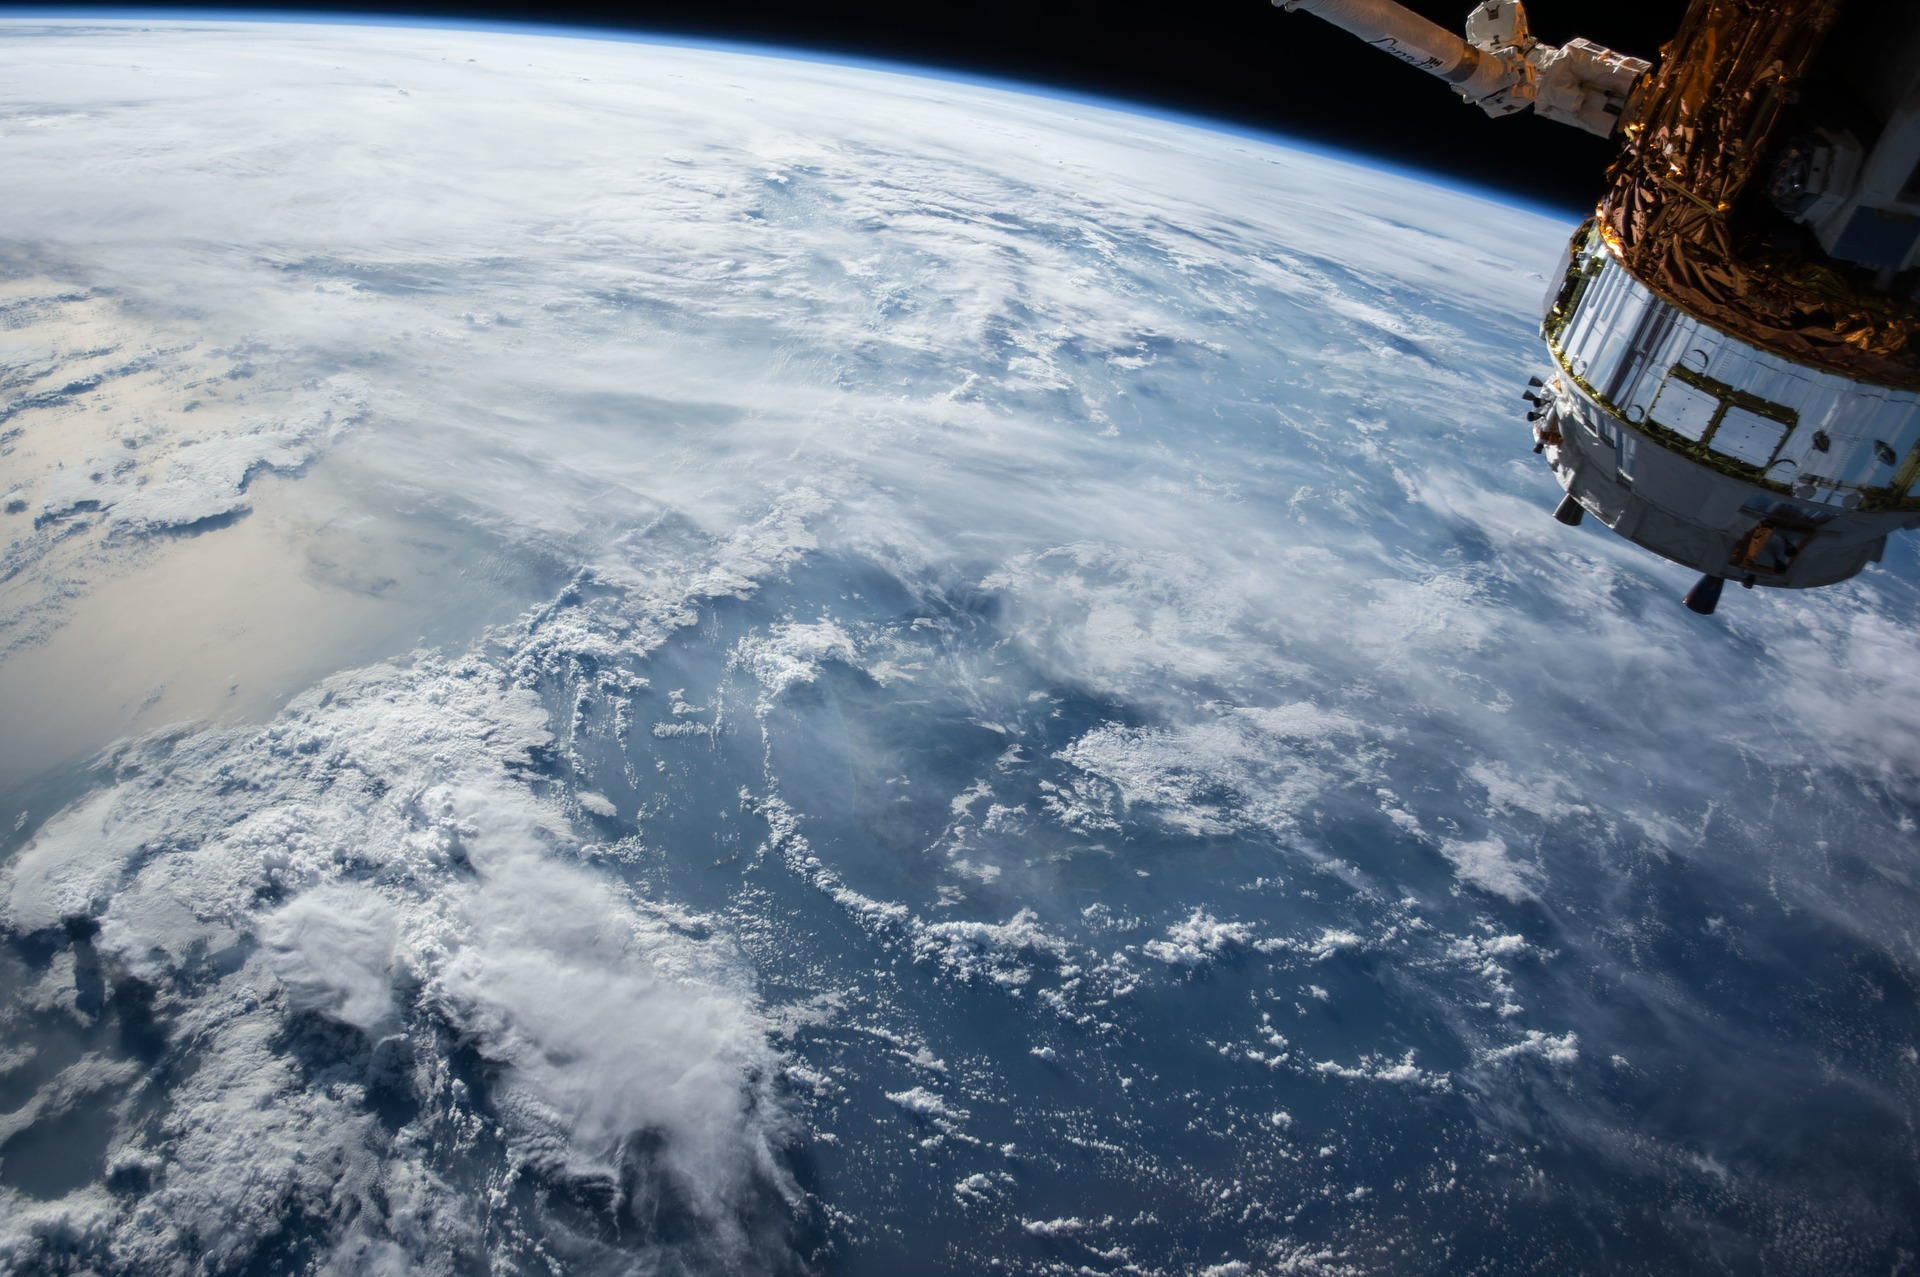

* Picture source at bottom of report

# Abstract <br>
---

This project uses satellite imagery data from [Sentinel Hub](https://www.sentinel-hub.com/) covering an area slightly southwest of Eugene, Oregon in the Siuslaw National Forest. Indices representing moisture levels, leaf chlorophyll depth, forest canopy density, and forest health were dervied from the satellite imagery data. The area was chosen because it contains a lot of forest, but also some very clear areas of past clear cutting, showing it is likely of interest for loggers. The goal of this project is to identify forest types using clustering machine learning algorithms. If forest types can be identified, this information will be very useful to logging companies prospecting future timber lots. After deriving the indices from the satellite data, major outliers from across the features were removed. Then, in order to help visualize the data and to reduce the dimensionality, principle component analysis was applied to bring the number of features used from 22 to 13. These 13 components were then used in the density based DBSCAN algorithm in order to find clusters. After optimizing the parameters for the DBSCAN model, two clusters were identified. An initial projection for these clusters is that the large cluster represents areas dominated by coniferous trees, mainly Douglas Fir and Western Hemlock. The second, smaller cluster may represent areas dominated by deciduous trees such as Red Alder and Big Leaf Maple. However, without comparing these clusters to tree surveys, the accuracy of this clustering algorithm cannot be determined.

# Business Problem <br>
---

In a previous [github repository](https://github.com/harperd17/Timber-Sale-Vaulation) I explored regression models in order to predict how much a plot of land would bid for in a timber auction through the Bureau of Land Management. One of the predictors this model was lacking was information on the species of trees. Since different tree species have different values, having this information would be a great addition to the prediction model. Since then, I have been contracted out again in order to see if using satellite imagery can offer any useful information about the land being auctioned. More specifically, I am hoping that satellite imagery can be used to group areas of forest by their primary tree type and/or health. This would be very useful in finding attractive forest plots to bid on.<br>
In order to do this I will apply the DBSCAN clustering algorithm to satellite imagery data in conjunction with elevation data in order to find high densities of pixel observations at certain values of these features. These high density areas will represent groupings or clusters of forests with similar attributes. If good clusters are found, this will serve as a starting point for further identfying these clusters before applying them to our existing pricing model. 

# Data <br>
--- 
Supporting code can be found [here](https://github.com/harperd17/Satellite-Imagery-Analysis/blob/main/Notebooks/Data_Notebook_Final.ipynb).

The data used consists of satellite data from [Sentinel Hub](https://www.sentinel-hub.com/). The satellite data is from two polar-orbiting satellites that make up "The Copernicus Sentinel-2 Mission". Sentinel Hub was a good choice for me because of the Python API they offer for pulling data. I created a trial account in order to request data within coordinates of interest. Each pixel in the images represents a 72m X 72m area. The image used is from an area with both historically logged and uncut forests southwest of Eugene, Oregon. The image is 691 x 894 pixels and represents an area with a northwest corner of (44.5833 N, 124.0333 W) and a southeast corner of (44 N, 123.4167 W). This area is roughly 49 km from east to west, and 64 km from south to north. These two areas were chosen because these areas were explored in one of my previous [github repositories](https://github.com/harperd17/Timber-Sale-Vaulation). <br><br>
The data pulled contains 12 raw features:<br> 
- <b>Band 1</b> - Coastal Aerosol - used to perform atmospheric corrections.<br>
- <b>Band 2</b> - Blue - commonly used for distinguishing decidious from confierous vegetation.<br>
- <b>Band 3 </b>- Green - can be used to infer plant vigor. <br>
- <b>Band 4</b> - Red - reflectance of red.<br>
- <b>Band 5 </b>- Vegetation Red Edge - transition zone between reflectance of red bands and near infrared bands due to the internal structures of leaves. <br>
- <b>Band 6</b> - Vegetation Red Edge - transition zone between reflectance of red bands and near infrared bands due to the internal structures of leaves. <br>
- <b>Band 7</b> - Vegetation Red Edge - transition zone between reflectance of red bands and near infrared bands due to the internal structures of leaves.<br>
- <b>Band 8 </b>- Near Infrared (NIR) - can show biomass content.<br>
- <b>Band 8A</b> - Narrow Near Infrared - discriminates moisture content and penetrates thin clouds.<br>
- <b>Band 9 </b>- Water Vapour - moisture levels in the atmosphere. <br>
- <b>Band 10 </b>- Short Wave Infrared (SWIR) - Cirrus - Measure of cirrus cloud contamination.<br>
- <b>Band 11</b> - SWIR1 - Measure of vegetation and soil moisture.<br>
- <b>Band 12</b> - SWIR2 - Improved measure of vegetation and soil moisture.<br>
- <b>Elevation</b> - The elevation in meters.<br>
<br>
Some of these bands show very similar things to other bands, such as bands 5, 6, and 7 all showing a variation of vegetation red edge. However, I am using all of these bands (except Bands 1 and 10 because I selected time frames with the cloud coverage in mind, and cloud coverage has no impact on what is on the ground, only on how it is perceived by the satellite) because the subtle differences between them may offer good information for clustering.

### Feature Engineering <br>
---

I added some common satellite imagery indices that seem useful for vegeation discrimination. More details on these indices and how they are calculated can be found [here](https://custom-scripts.sentinel-hub.com/) under the Sentinel-2 portion of the webpage.

- <b>Moisture Index (MSI)</b> - Measures the water content in the canopy leaves of a forest.<br>
- <b>Chlorophyll Red Edge (CRE)</b> Gives information about total chlorophyll content on the ground. <br>
- <b>Enhanced Vegetation Index (EVI) </b>- Corrects for soil background signals and atmospheric influences. It's good in areas of dense canopy coverage.<br>
- <b>Normalized Difference Vegetation Index (NDVI)</b> - Normalizes green leaf scattering in Near Infra-red wavelengths with chlorophyll absorption in red wavelengths. Used for quantifying green vegetation.<br>
- <b>Green Normalized Difference Vegetation Index (GNDVI)</b> - This is similar to NDVI but is more sensitive to variation in chlorophyll content. <br>
- <b>Modified Chlorophyll Absorption in Reflectance Index (MCARI)</b> - This gives a measure of the depth of chlorophyll absorption. <br>
- <b>Leaf Area Index (LAI)</b> - This measures the green-leaf area in a unit of land. <br>
- <b>Color Correction (CC)</b> - This is a Sentinel Hub algorithmic transformation of the red, green, and blue values. It performs a linear atmospheric correction and applies a curve to the color components. This enhances details in the dark areas. Since most of the areas in these satellite images are dark green, this may help distinguish the different shades. <br>
- <b>Plant Senescence Reflectance Index (PSRI)</b> - This index is used to monitor the health of vegetation.

After the bands and indices have been pulled and created, the data is 3 dimensional (latitudinal location x longitudinal location x 22 features). In order to perform analysis, the data was transformed into a 2 dimensional dataframe ( {image height + image width} x 22 features). The transformed data contains 617,754 pixel observations.

# Data Visualizations <br>
---
Supporting code can be found [here](https://github.com/harperd17/Satellite-Imagery-Analysis/blob/main/Notebooks/EDA.ipynb).

All of the data bands and engineered indices can be visualized by plotting them similarly to an image, and using the associated values as the color coding. In order to enhance the figures, some have had their values multiplied by a factor in order to bring out the colors. Also, some bands and indices have some major outliers, which 'hog' a lot of the color space in the color bar (makes the majority of the data appear as one color). Therefore, in those instances, the outliers have been removed for the visualizations below.

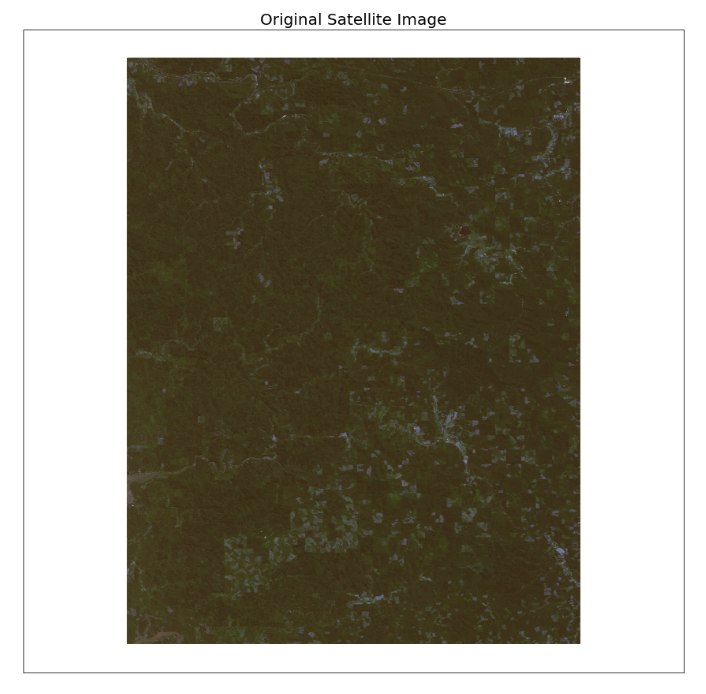

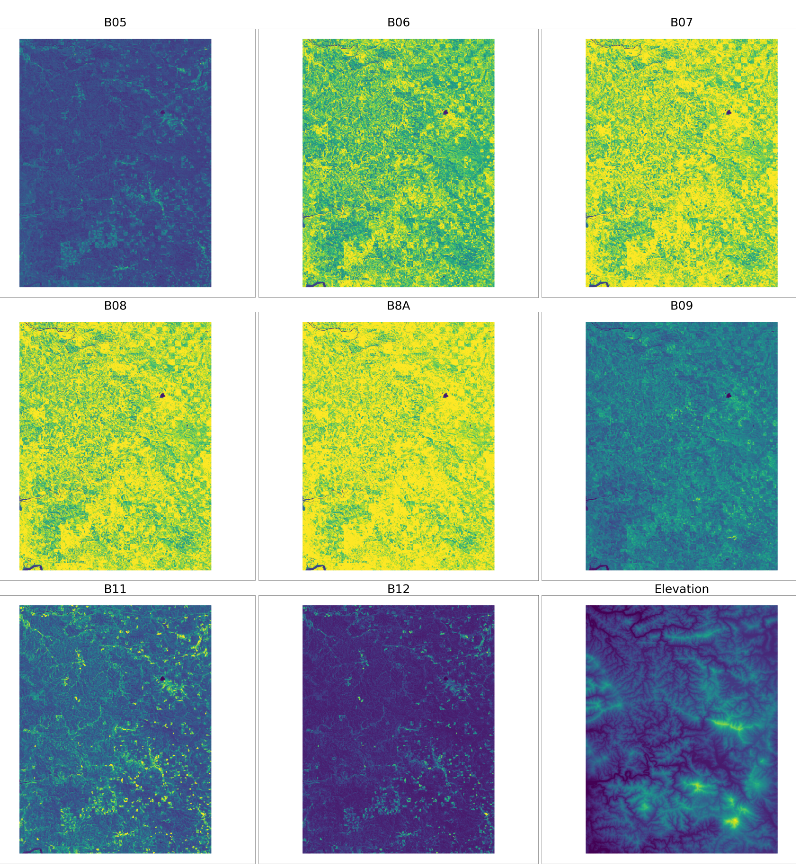

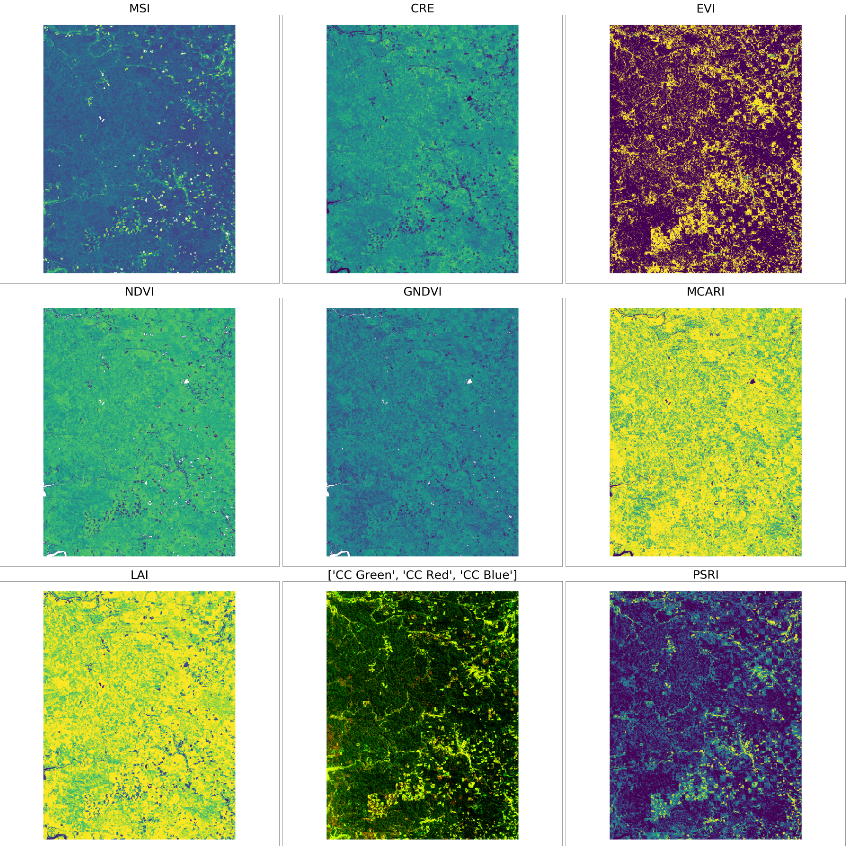

<b>Figure 1:</b> The above figure shows all of the features listed under Data and Feature Engineering with their values mapped as colors. There are lots of variations in values across all of images.

Next, when looking at the distributions of values in each band and index individually, the majority appear to follow a unimodal distribution. The distributions of the red, green, and blue bands show small spikes on their way down from the mode on either side. This can be seen below in the example of the green band.

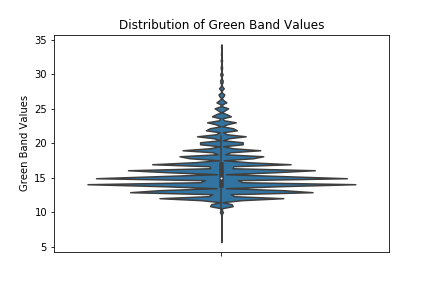

<b>Figure 2:</b> This figure shows how there are many spikes in the frequencies of green values.

Next, outliers were removed from the data (this includes values of infinity that sparely occurred when calculating the indices under 'Feature Engineering'). The rationale for this is that many of the outliers are very extreme. I am worried that such extreme outliers will negatively impact the analysis later on. Due to the removal of the outliers, the data took a 13.3% loss. My initial guess for the source of these outliers is due to collection error. However, I am not a satellite imagery expert, so this could be incorrect. <br>
After removing the major outliers from the data in the same way they were removed when plotting them in Figure 1, a few of the distributions appear to be bi-modal. For each of these distributions, one of the modes is much larger in size than the other. These distributions can be seen below: 

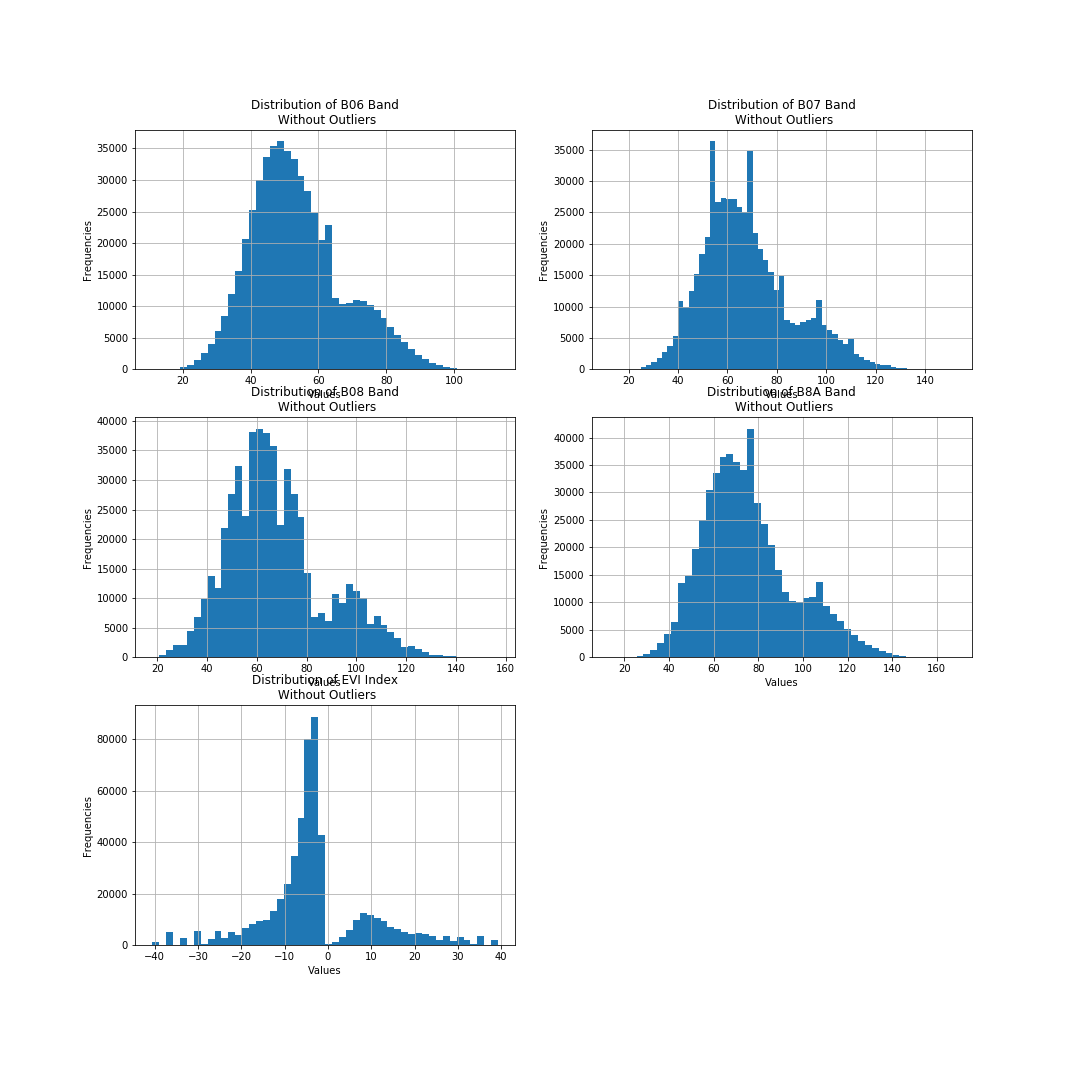

<b>Figure 3: </b>This figure shows the bi-modal distributions present in some of the features. In all of these features, there is a main mode, and then a smaller mode next to it.

When exploring the data, I also noticed there are extremely high densities of values on certain ends of the range of values for some of features. Mainly, Leaf Area Index (LAI) has a large frequency in values of 255. Similarly, the color corrected red, color corrected green, and PSRI indices has thick concentrations of pixels with values of 0. This seems odd to me and I can't figure out what may be causing this. More subject-area expertise may be needed to figure that out. For now, no action will be taken on these features.

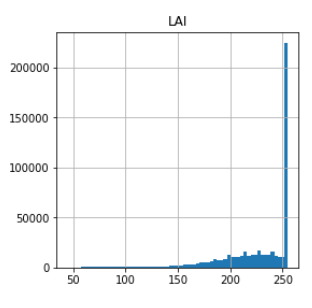

<b>Figure 4: </b>This is an example of the high frequencies occurring on certain ends of the value ranges for some of the features. Here, with the Leaf Area Index, there is a high frequency of values equal to 255.

Next, in order to roughly visualize all of the features together, I plotted the first two principle components as a function of density. Because clustering is very sensitive to the scaling of data, I created a set of components using both the standard scaling technique and the min max scaling technique in order to compare the two.

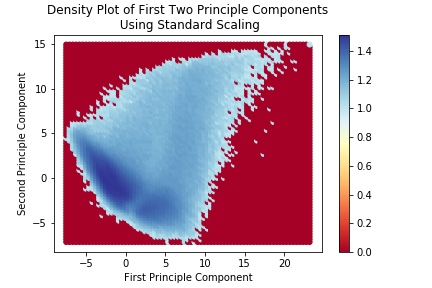

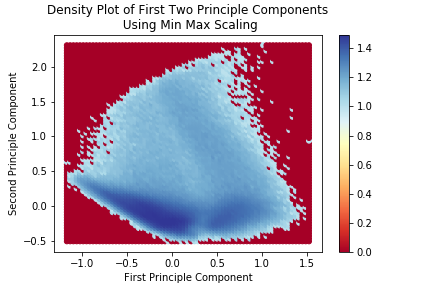

<b>Figure 5:</b> The above figures show the density of the first two principle components depending on which scaling method is used. Each block of color represents how many points are found within the associated bounds of the first and second principle components.

When looking at the two density plots above, they both look pretty similar. However, one subtle difference is that the density plot of the min max scaling technique seems slightly more dense in the two clusters at the bottom of the plot, as shown by the slightly darker shades of blue. Also, outside of these two clusters of density, the blues in the min max scaling plot look slightly lighter, showing slightly less dense regions outside of the clusters. For these two subtle differences, I have a preference for the min max scaling with this data set.

# Data Preparation <br>
---

- As stated earlier, during the creation of the engineered features, some values were either infinity or negative infinity. I replaced these values with n/a and then dropped all rows with an n/a in it. The number of rows dropped from this operation was very small. <br>
- As stated above under the Data Visualizations section, major outliers were removed for certain features. Values outside the ranges for the features shown below were removed.

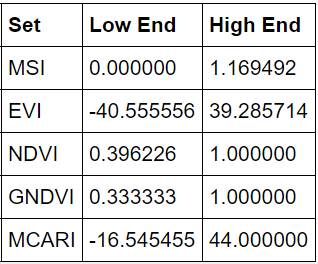

- Next, min max scaling was applied to the data.<br>
- Then 13 principle components were derived from the scaled data. It is likely that only 8 are truly necessary, but by using 13, the components capture an additional 2% of the raw feature information. These 13 principle components will be used in place of the original features and engineering features, as they capture roughly 99.5% contained in them, only taking up roughly half the feature space. The total variance explained with the addition of each principle component can be seen in the figure below.

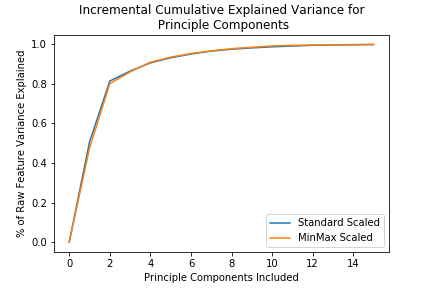

<b>Figure 6:</b> The above figure shows the cumulative explained variance for each addition of another principle component. After 13 principle components have been included, the additional variance explained for subsequent components is negligible.

# Modeling <br>
---

When deciding which clustering algorithms to use, I first looked at the density plot of the first two principle components. It gives a good idea of what some of the clusters may be. There are two obvious areas of high density shown in figure 5. These two areas are surrounded by less dense scatterings of data, which initially appears to be noise.<br>
In determining which model to use, I am considering the following:<br>
- <b>K-Means:</b> This algorithm would be good for a large data set such as this because of its scalability. However, K-Means is generally good for spherically shaped clusters. In this data, the clusters appear to be elongated and if a sphere were fit to them, the clusters would be overlapping in places. K-Means also has trouble grouping data where the clusters are of varying sizes (which they appear to be here). Lastly, since all points must be put into a cluster in K-Means, the "noise" in our data will likely cause problems. Even though soft clustering is available in K-Means, I don't think this will compensate for the other shortcomings of K-Means when applied to this data.<br>
- <b>Hierarchical Clustering: </b>This algorithm is complex in terms of time, so may not scale well to a large data set like this (although if the algorithm was the best fit for the data, I wouldn't let that be the deciding factor since this data set isn't enormous). Also, since the algorithm works by continuing to combine clusters based on the Euclidean distance, I am concerned that it may combine 'noise' with the true clusters since a lot of the noise appears to be very close to the clusters. Also, the order of the data matters. This could be good because a pixels properties are likely to be similar to the pixels next to it. However, it may be difficult to represent these proximities in 2D space, when the proximities exist in 3D space. For example, a pixel that has pixels to the left or right will still have these pixels close by in the dataframe, but pixels above and below may be thousands of lines away in the dataframe.<br>
- <b>DBSCAN: </b>DBSCAN clusters based on the number of points within a specified radius rather than solely on Euclidean distance between points. Since this data has many points close to each other spread across the dimensional space, a measure of density will work much better in finding clusters. This algorithm classifies each point as either a core point, border point, or a noise point, and only core points and border points are clustered. This allows the noisy points and outliers to not impact how the clusters form like in the K-Means and Hierarchical Clustering. Another advantage over K-Means is that DBSCAN doesn't assume spherical clusters. I am choosing DBSCAN as the clustering algorithm to apply to this data.

<b>DBSCAN Difficulties: </b>The DBSCAN algorithm requires a lot of RAM in order to make the algorithm run quickly. Therefore, I am not able to run DBSCAN on the entire data set on my laptop. A work around suggested is to pre-compute a radius neighbors graph and use that to fit the DBSCAN and passing metric = 'precomputed' into the model. However, I still ran into memory issues. My solution was to split the data into 50 randomly sampled chunks and run DBSCAN on each one. After running DBSCAN on each chunk I compare the groupings created to the existing groups from the preceding chunks and merge groups as necessary.

# Model Evaluation and Selection
---

There are two parameters to fitting a DBSCAN model. The first is <b>minimum points</b> and the second is <b>epsilon</b>. Minimum points specifies how many points must be within a radius epsilon of a point for it to be considered a core sample. Then, all points within epsilon of the core sample are considered border samples and are added to the cluster. A cluster is made of all core samples for which the surrounding bubbles of radius epsilon touch.<br>
I set the minimum points parameter equal to 26 because it is twice the number of features used in the DBSCAN model. This is considered as a rule of thumb for setting the minimum points parameter.<br>
Next, in order to estimate a good value for epsilon, for each observation, I calculated the minimum euclidean distance required in order to contain 'minimum points' points within it. Then, I sorted the values and plotted them as shown below.

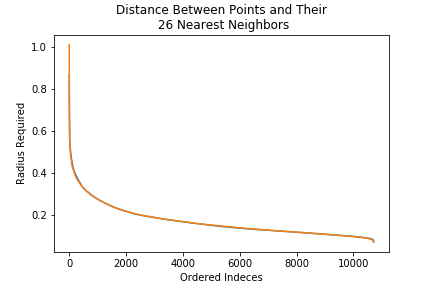

<b>Figure 7: </b>This shows the sorted values of the minimum radius around each point required in order to fit 26 points.

A good value for epsilon is where the radius plot shows an 'elbow'. In figure 7, there is an elbow that starts at a radius of about 0.35. This elbow starts to flatten out at a radius of about 0.2. Next, I fit DBSCAN for each radius within 0.1 and 0.35, incrementing the radius every 0.025. I started the radius search at 0.1 instead of 0.2 simply because I wanted to search more possible epsilon values. After fitting each DBSCAN model, the silhouette score was recorded. After fitting models for each possible value of epsilon, the silhouette scores were plotted and are shown below.

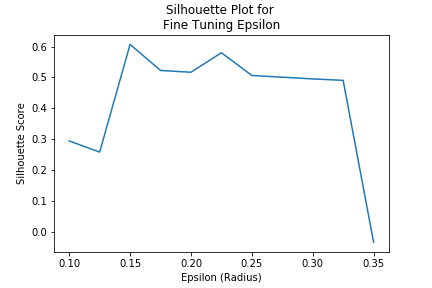

<b>Figure 8: </b>This plot shows the silhouette score for each value of epsilon tested. The highest scores are yielded with epsilon values between the values 0.15 and 0.225.

<b>Silhouette Scores: </b>The highest value on the Silhouette plot is achieved with an epsilon of 0.15, which yields a score close to 0.6. This score suggests the cluster(s) are non-overlapping and strongly dense. Due to the non-convex nature of the clusters in this data, this score is lower than if the clusters were convex. The epsilon values ranging from 0.2 to 0.225, however, all yield silhouette scores of roughly 0.5 or higher and all sit between the two peaks of silhouette scores. I plotted the clusters as a function of the first two principle components for the epsilon values 0.15 through 0.225. They are seen below.<br>

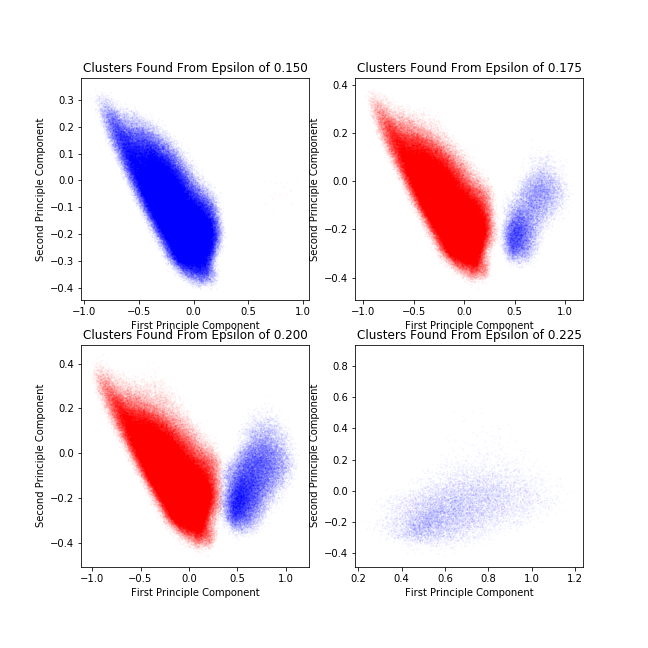

<b>Figure 9: </b>This figure shows the different sets of clusters yielded from different values of epsilon.

Based on the clustering above:<br>
- <b>Epsilon of 0.15:</b> This doesn't really have two clusters. Most of the points were bucketted into the noise group. This clustering is not good for this data. Even though this yielded the highest silhouette score, it is not the best epsilon value.<br>
- <b>Epsilon of 0.175:</b> This clustering looks pretty good. The two groups are separated and dense.<br>
- <b>Epsilon of 0.2:</b> This clustering also looks pretty good. The two groups are not separated as nicely as with epsilon of 0.175, but the blue cluster is more dense and larger.
- <b>Epsilon of 0.225:</b> This cluster result looks pretty awful.

<b> Selected Model:</b> I am concluding that the clusters yielded from an epsilon value of 0.2 are the strongest. This will be my clustering model of choice - DBSCAN with min points of 26 and epsilon of 0.2.

# Conclusions
---

I mapped the cluster labels to the original data set and plotted them as colors as if it were an image. I also plotted histograms for all features as a function of the cluster in order to show how the clusters differ.

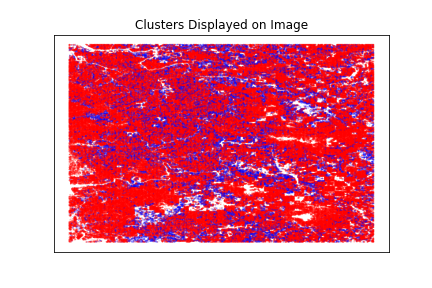

<b>Figure 10: </b>This shows the cluster labels plotted like an image. the red is the main cluster, the blue is the smaller cluster, and the white is the noise that was not clustered at all.

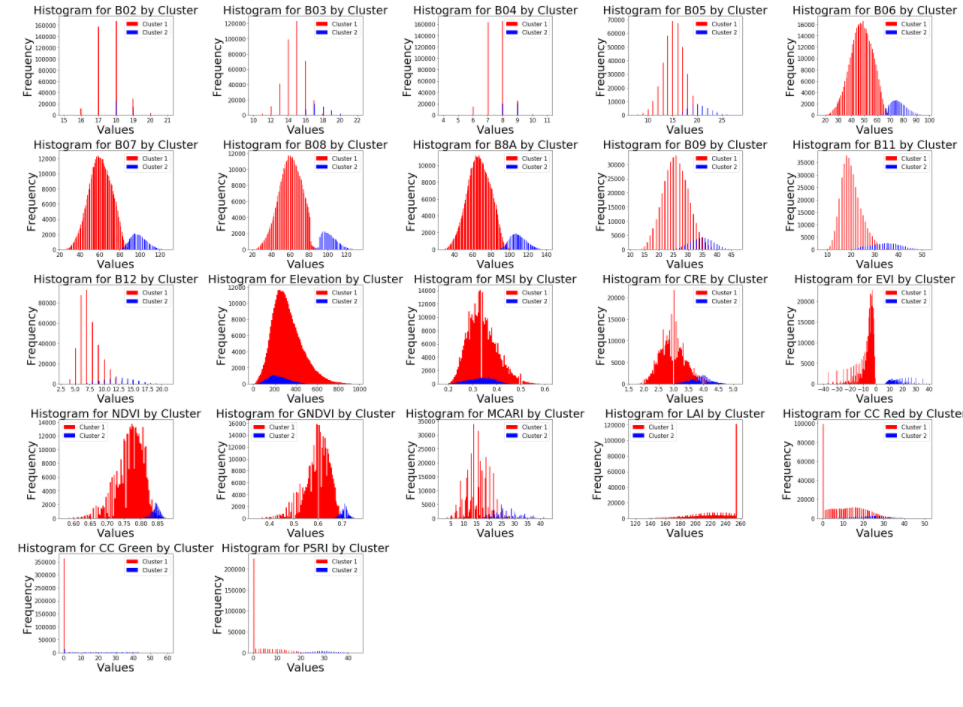

<b>Figure 11: </b>This figure shows the clusters distributions for each feature. The red cluster is cluster 1, and the blue cluster is cluster 2.

## Differences between clusters

<b>Cluster 1: </b>This is the main cluster (red). It has a lot more points belonging to it than that second cluster has. It typically has lower values for the B03, B05, B06, B07, B08, B8A, B09,B11, and B12 bands as well as the CRE, EVI, NDVI, GNDVI, MCARI, and PSRI indices. When looking at the distributions in the EDA file, I had pointed out that many of the feature distributions appear to have a large frequency mode, and a lower frequency mode on the distributions way down to the right (see figure 3). This cluster appears to belong to the underlying distribution of the high frequency mode.<br>
<b>Cluster 2:</b> This is the smaller cluster (blue). It has a lot less points belonging to it than the first cluster has. For all the bands and indices for which the first cluster typically has lower values, this cluster tends to have higher values. For the features pointed out in the EDA file with the 'humps' or lower frequency modes, it appears as if this cluster belongs to the underlying distributions of these low frequency modes. 

The green values (B03) are about 3 units smaller than that of the second cluster on average. This means the trees in cluster 1 tend to be a lighter shade of green. <br>
The bands that have to do with Vegetation Red Edge (B05, B06, and B07) are between 25% and 38% lower than those of the second cluster on average. This means the trees in cluster 1 are reflecting less light in the infrared red spectrum than those in cluster 2. Since B08 and B8A measure near infrared and narrow infrared reflectance, this explains the lower values on average for these bands in cluster 1 as well. In general, deciduous tree tend to reflect more light in the infrared red spectrum. <br>
Cluster 1 has values for the B09, B11, and B12 bands that are roughly 28% to 42% lower than those in cluster 2. These three bands reflect the levels of moisture in the vegetation and soil. This suggests that trees in cluster 1 are living in a drier environment compared to cluster 2. <br>
The median values for the vegetation indices (NDVI, GNDVI, and EVI) are lower in cluster 1 than those in cluster 2. This implies that cluster 2 provides a more lush environment. The mean NDVI for cluster 2 is 0.84, and the values get as high as 0.88. A value of 1 is associated with a tropical rainforest, so these values may indicate an environment similar to a temperate rainforest.<br>
The Chlorophyll Red Edge (CRE) is 23% lower on average in cluster 1. CRE indicates the amount of chlorophyll on the ground. A higher value on average within cluster 2 suggests there is more lush undergrowth in cluster 2. <br>
Cluster 1 has lower MCARI values than cluster 2 on average (44% lower on average). This suggests the canopy in cluster 2 is more dense on average. This agrees with the differences between Leaf Area Index (LAI) distributions across the two clusters. The average LAI for the first cluster is 10% lower than that of the second cluster.<br>
The Plant Senescence Reflectance Index (PSRI) levels in the second cluster are much higher on average than in the first cluster. PSRI is usually used to indicate the health of a forest. This suggest the trees in the second cluster are healthier.<br>
Lastly, it is also important to note that the elevations found in cluster 1 range from 0 meters above sea level to as high as over 900 meters. The elevations for cluster 2, however, only range from 0 to roughly 500 meters above sea level.

# Interpretations
---

After [reading](https://oregonwild.org/siuslaw-national-forest#:~:text=The%20trees%20in%20the%20Siuslaw,and%20Big%20leaf%20Maple%20trees.) up about the trees in the region this data is from (Siuslaw National Forest), I found that this area is made up of Sitka Spruce (coniferous) near the coast, and Douglas Fir and Western Hemlock (coniferous) growing inland. Trees growing near rivers and streams consist mainly of Red Alder and Big Leaf Maple (both deciduous) as well as Western Red Cedar (coniferous). Other deciduous trees that can be found in this area are oak, madrone, and ash. <br>
Since deciduous trees tend to grow in areas surrounding streams, I think cluster 2 may be associated with areas containing a mainly deciduous trees. This would explain the higher infrared red reflection ratios (as explained above), higher canopy moisture levels (more moisture near streams), and the thicker, more vegetated undergrowth and canopy (water sources usually produce more plant life, and healthier plant life). This would also explain the small size of cluster 2, because most of the forests in this area are dominated by the coniferous Douglas Fir and Western Hemlock.

# Limitations
---

- The only way to really know what these clusters represent is to compare these clustered areas to tree survey reports. Once compared with such data, this clustering may be useful for the timber company prospecting potential timber plots in predicting the species of trees contained in the plot.<br>
- Another limitation of this clustering is that the true nature of the outliers removed is not known. It could be that the outliers I removed were important.<br>
- The DBSCAN algorithm is very limiting in terms of clustering capabilities due to the memory required.<br>
- I have background knowledge in Forestry, but I don't have experience applying chemistry, biology, or physics to Forestry. This model is a good starting point for further research.

# Future Work

The next step for this project is to get advice from subject-matter experts in order to get suggestions on additional indices to add to the clustering algorithm. Also, I will need to meet with satellite imagery experts to fully understand the nature of the extreme outliers present in the data. The combination of these two actions would hopefully yield more than two clusters. <br>
Lastly, whatever clusters have been found need to be explored by looking at historic tree surveys from the area this project studies. This will give me a way to determine the accuracy of my interpretations from this project.

The image used under the title was downloaded from [this source.](https://pixabay.com/photos/satellite-iss-1030779/)